# Trabajo Práctico 1 - Laboratorio de Datos - 1C 2025

**Integrantes del grupo:** Julian Hardie, Walter Yance, Rodrigo Gustavo Coppa

In [1]:
# Descomentar y correr esto una sola vez
!pip install plotly --upgrade
!pip install geopandas

   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   -- ------------------------------------- 1.0/16.1 MB 6.3 MB/s eta 0:00:03
   ------ --------------------------------- 2.6/16.1 MB 6.6 MB/s eta 0:00:03
   ---------- ----------------------------- 4.2/16.1 MB 7.0 MB/s eta 0:00:02
   -------------- ------------------------- 5.8/16.1 MB 6.9 MB/s eta 0:00:02
   ----------------- ---------------------- 7.1/16.1 MB 6.9 MB/s eta 0:00:02
   ---------------------- ----------------- 8.9/16.1 MB 7.0 MB/s eta 0:00:02
   ------------------------- -------------- 10.2/16.1 MB 7.0 MB/s eta 0:00:01
   ----------------------------- ---------- 11.8/16.1 MB 7.0 MB/s eta 0:00:01
   -------------------------------- ------- 13.1/16.1 MB 7.0 MB/s eta 0:00:01
   ------------------------------------ --- 14.7/16.1 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------  16.0/16.1 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 16.1/16.1 MB 6.7 MB/s eta 0:00:00


In [2]:
# Si requieren mas librerias, pueden importarlas aca
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import seaborn.objects as so
import json
import plotly.express as px
import matplotlib.pyplot as plt
from formulaic import Formula
from sklearn import linear_model  
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error 
from sklearn.linear_model import LinearRegression

# Si no existe root_mean_squared_error, quitarlo o actualizar scikit-learn con el comando
#!pip install scikit-learn --upgrade

In [3]:
df_educacion = pd.read_csv(r"C:\Users\Usuario\Downloads\indicadores-proceso-trayectoria-sobreedad-2012_2022.csv")
df_educacion

,anio,municipio_id,municipio_nombre,promocion_efectiva_primaria,promocion_efectiva_secundaria,repitencia_primaria,repitencia_secundaria,reinscripcion_primaria,reinscripcion_secundaria,abandono_interanual_primaria,...,alumnos_no_promovidos_primaria,alumnos_no_promovidos_secundaria,salidos_sin_pase_primaria,salidos_sin_pase_secundaria,salidos_con_pase_primaria,salidos_con_pase_secundaria,sobreedad_primaria,sobreedad_secundaria,sobreedad_avanzada_primaria,sobreedad_avanzada_secundaria
0,2012,6007,Adolfo Alsina,100.26,84.14,1.25,9.06,0.07,1.79,-1.57,...,1.45,18.54,0.00,2.71,5.40,2.90,12.61,26.77,4.01,12.28
1,2013,6007,Adolfo Alsina,97.35,86.84,1.68,5.31,0.13,0.12,0.84,...,0.70,9.48,0.30,2.77,5.02,5.72,10.27,26.27,3.42,11.51
2,2014,6007,Adolfo Alsina,97.36,80.79,2.23,2.52,0.07,0.43,0.34,...,0.69,9.13,0.13,2.11,4.84,4.31,8.46,25.06,2.51,9.17
3,2015,6007,Adolfo Alsina,96.00,91.55,2.41,5.24,0.21,0.85,1.38,...,1.47,8.62,0.33,2.49,4.96,4.64,7.16,30.85,1.86,10.51
4,2016,6007,Adolfo Alsina,97.67,95.56,2.61,7.27,0.07,1.29,-0.35,...,1.58,6.95,0.14,2.79,4.72,3.57,6.81,26.13,1.69,8.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,2018,6882,Zarate,95.42,87.30,3.83,8.27,0.06,1.80,0.69,...,2.28,12.39,0.09,2.37,2.42,3.58,7.91,28.77,2.06,11.73
1481,2019,6882,Zarate,95.62,86.58,3.55,9.53,0.01,0.83,0.82,...,1.97,13.63,0.08,0.51,3.30,3.67,8.10,27.71,1.89,10.12
1482,2020,6882,Zarate,99.51,99.06,0.04,0.00,0.00,0.09,0.45,...,0.00,0.58,0.03,0.05,3.12,3.62,6.81,28.88,1.65,11.53
1483,2021,6882,Zarate,96.77,90.87,2.79,6.60,0.17,0.64,0.28,...,0.21,8.23,0.03,0.25,1.28,0.66,4.50,27.81,0.89,11.15


In [4]:
df_educacion.head()

,anio,municipio_id,municipio_nombre,promocion_efectiva_primaria,promocion_efectiva_secundaria,repitencia_primaria,repitencia_secundaria,reinscripcion_primaria,reinscripcion_secundaria,abandono_interanual_primaria,...,alumnos_no_promovidos_primaria,alumnos_no_promovidos_secundaria,salidos_sin_pase_primaria,salidos_sin_pase_secundaria,salidos_con_pase_primaria,salidos_con_pase_secundaria,sobreedad_primaria,sobreedad_secundaria,sobreedad_avanzada_primaria,sobreedad_avanzada_secundaria
0,2012,6007,Adolfo Alsina,100.26,84.14,1.25,9.06,0.07,1.79,-1.57,...,1.45,18.54,0.00,2.71,5.40,2.90,12.61,26.77,4.01,12.28
1,2013,6007,Adolfo Alsina,97.35,86.84,1.68,5.31,0.13,0.12,0.84,...,0.70,9.48,0.30,2.77,5.02,5.72,10.27,26.27,3.42,11.51
2,2014,6007,Adolfo Alsina,97.36,80.79,2.23,2.52,0.07,0.43,0.34,...,0.69,9.13,0.13,2.11,4.84,4.31,8.46,25.06,2.51,9.17
3,2015,6007,Adolfo Alsina,96.00,91.55,2.41,5.24,0.21,0.85,1.38,...,1.47,8.62,0.33,2.49,4.96,4.64,7.16,30.85,1.86,10.51
4,2016,6007,Adolfo Alsina,97.67,95.56,2.61,7.27,0.07,1.29,-0.35,...,1.58,6.95,0.14,2.79,4.72,3.57,6.81,26.13,1.69,8.24


In [5]:
df_educacion.columns

Index(['anio', 'municipio_id', 'municipio_nombre',
       'promocion_efectiva_primaria', 'promocion_efectiva_secundaria',
       'repitencia_primaria', 'repitencia_secundaria',
       'reinscripcion_primaria', 'reinscripcion_secundaria',
       'abandono_interanual_primaria', 'abandono_interanual_secundaria',
       'alumnos_promovidos_primaria', 'alumnos_promovidos_secundaria',
       'alumnos_no_promovidos_primaria', 'alumnos_no_promovidos_secundaria',
       'salidos_sin_pase_primaria', 'salidos_sin_pase_secundaria',
       'salidos_con_pase_primaria', 'salidos_con_pase_secundaria',
       'sobreedad_primaria', 'sobreedad_secundaria',
       'sobreedad_avanzada_primaria', 'sobreedad_avanzada_secundaria'],
      dtype='object')

### Procesamiento de Datos

In [7]:
df_educacion.dtypes

anio                                  int64
municipio_id                          int64
municipio_nombre                     object
promocion_efectiva_primaria         float64
promocion_efectiva_secundaria       float64
repitencia_primaria                 float64
repitencia_secundaria               float64
reinscripcion_primaria              float64
reinscripcion_secundaria            float64
abandono_interanual_primaria        float64
abandono_interanual_secundaria      float64
alumnos_promovidos_primaria         float64
alumnos_promovidos_secundaria       float64
alumnos_no_promovidos_primaria      float64
alumnos_no_promovidos_secundaria    float64
salidos_sin_pase_primaria           float64
salidos_sin_pase_secundaria         float64
salidos_con_pase_primaria           float64
salidos_con_pase_secundaria         float64
sobreedad_primaria                  float64
sobreedad_secundaria                float64
sobreedad_avanzada_primaria         float64
sobreedad_avanzada_secundaria   

**1.** Describir el tipo de variable de cada columna

El tipo de variable de las columnas, en su mayoría, es Numérica y Continua ya que toma valores intermedios como la de **repitencia_primaria** o **abandono_interanual_primaria**, entre otras columnas. Estas representan el porcentaje de alumnos que, por ejemplo, en repitencia_primaria repiten el año para ese nivel educativo en un determinado municipio y un año determinado. 

Para las columnas **anio** y **municipio_id** las variables son tambien numéricas pero discretas ya que no representan valores intermedios. Además, el año tiene un orden específico ya que van del 2012 al 2022 y se vuelve a repetir el ciclo para otro Municipio. También podemos notar que el id del Municipio todas arrancan en 06 (Adolfo Alsina en 06007 es el primero) y van aumentando hasta el ultimo Municipio, que es Zárate, hasta 06882. 

Por último, para la columna **municipio_nombre** la variable es Categórica y Nominal ya que aunque estén ordenadas alfabéticamente, no tienen un orden en si entre ellas. 

**2.** ¿La base de datos contiene datos faltantes? ¿Cuántos?

Se puede ver en la siguiente tabla que no hay filas con datos faltantes. Es decir ninguna de ellas contiene valores nulos o NaN. Tambien podemos observar que hay valores negativos en las columna de **abandono_interanual_primaria** y **abandono_interanual_secundaria** esto se puede deber a como está descripta la fórmula para el cálculo del porcentaje. Además, podemos ver que hay porcentajes que superan el 100%, como en la de **promocion_efectiva_primaria**, esto se puede deber a que hay alumnos que avanzan de grado pero no estan inscriptos o algo por el estilo.

In [10]:
faltantes = df_educacion.isna().sum()
faltantes

anio                                0
municipio_id                        0
municipio_nombre                    0
promocion_efectiva_primaria         0
promocion_efectiva_secundaria       0
repitencia_primaria                 0
repitencia_secundaria               0
reinscripcion_primaria              0
reinscripcion_secundaria            0
abandono_interanual_primaria        0
abandono_interanual_secundaria      0
alumnos_promovidos_primaria         0
alumnos_promovidos_secundaria       0
alumnos_no_promovidos_primaria      0
alumnos_no_promovidos_secundaria    0
salidos_sin_pase_primaria           0
salidos_sin_pase_secundaria         0
salidos_con_pase_primaria           0
salidos_con_pase_secundaria         0
sobreedad_primaria                  0
sobreedad_secundaria                0
sobreedad_avanzada_primaria         0
sobreedad_avanzada_secundaria       0
dtype: int64

**3.** Además de la división por municipio, nos interesa saber a que zona de la provincia pertenece cada municipio (Zona Norte, Zona Oeste , Zona Sur e Interior). Para esto:

**(a)** Implementar una función **determinar_zona** que, dado el nombre de un municipio, devuelva a que zona pertencece: ’Norte’, ’Oeste’, ’Sur’ o ’Interior’.

In [12]:
zona_norte = ['San Isidro', 'Vicente Lopez', 'General San Martin', 'San Fernando', 'Tigre']
zona_oeste = ['Moron', 'Tres de Febrero', 'La Matanza', 'Merlo', 'Moreno']
zona_sur = ['Almirante Brown', 'Avellaneda', 'Quilmes', 'Lanus', 'Florencio Varela', 'Berazategui', 'Lomas de Zamora', 'Esteban Echeverria']

In [13]:
def determinar_zona(municipio):
    if municipio in zona_norte:
        return "Norte"
    elif municipio in zona_oeste:
        return "Oeste"
    elif municipio in zona_sur:
        return "Sur"
    else:
        return "Interior"

In [14]:
determinar_zona("San Isidro")

'Norte'

**(b)** Agregar la columna zona a df_educacion que contenga la zona a la que pertenece el municipio.

In [43]:
df_educacion["zona"] = df_educacion["municipio_nombre"].apply(determinar_zona)
df_educacion

,anio,municipio_id,municipio_nombre,promocion_efectiva_primaria,promocion_efectiva_secundaria,repitencia_primaria,repitencia_secundaria,reinscripcion_primaria,reinscripcion_secundaria,abandono_interanual_primaria,...,salidos_sin_pase_primaria,salidos_sin_pase_secundaria,salidos_con_pase_primaria,salidos_con_pase_secundaria,sobreedad_primaria,sobreedad_secundaria,sobreedad_avanzada_primaria,sobreedad_avanzada_secundaria,zona,mayor_repitencia_primaria
0,2012,6007,Adolfo Alsina,100.26,84.14,1.25,9.06,0.07,1.79,-1.57,...,0.00,2.71,5.40,2.90,12.61,26.77,4.01,12.28,Interior,False
1,2013,6007,Adolfo Alsina,97.35,86.84,1.68,5.31,0.13,0.12,0.84,...,0.30,2.77,5.02,5.72,10.27,26.27,3.42,11.51,Interior,False
2,2014,6007,Adolfo Alsina,97.36,80.79,2.23,2.52,0.07,0.43,0.34,...,0.13,2.11,4.84,4.31,8.46,25.06,2.51,9.17,Interior,False
3,2015,6007,Adolfo Alsina,96.00,91.55,2.41,5.24,0.21,0.85,1.38,...,0.33,2.49,4.96,4.64,7.16,30.85,1.86,10.51,Interior,False
4,2016,6007,Adolfo Alsina,97.67,95.56,2.61,7.27,0.07,1.29,-0.35,...,0.14,2.79,4.72,3.57,6.81,26.13,1.69,8.24,Interior,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,2018,6882,Zarate,95.42,87.30,3.83,8.27,0.06,1.80,0.69,...,0.09,2.37,2.42,3.58,7.91,28.77,2.06,11.73,Interior,False
1481,2019,6882,Zarate,95.62,86.58,3.55,9.53,0.01,0.83,0.82,...,0.08,0.51,3.30,3.67,8.10,27.71,1.89,10.12,Interior,False
1482,2020,6882,Zarate,99.51,99.06,0.04,0.00,0.00,0.09,0.45,...,0.03,0.05,3.12,3.62,6.81,28.88,1.65,11.53,Interior,True
1483,2021,6882,Zarate,96.77,90.87,2.79,6.60,0.17,0.64,0.28,...,0.03,0.25,1.28,0.66,4.50,27.81,0.89,11.15,Interior,False


**4.** Quisiéramos analizar si en general la tasa de repitencia es más alta en primaria que en secundaria. Para esto:

**(a)** Agregar una columna **mayor_repitencia_primaria** a df_educacion que indique si ocurre esta situación.

In [46]:
df_educacion["mayor_repitencia_primaria"] = df_educacion["repitencia_primaria"] > df_educacion["repitencia_secundaria"]
df_educacion

,anio,municipio_id,municipio_nombre,promocion_efectiva_primaria,promocion_efectiva_secundaria,repitencia_primaria,repitencia_secundaria,reinscripcion_primaria,reinscripcion_secundaria,abandono_interanual_primaria,...,salidos_sin_pase_primaria,salidos_sin_pase_secundaria,salidos_con_pase_primaria,salidos_con_pase_secundaria,sobreedad_primaria,sobreedad_secundaria,sobreedad_avanzada_primaria,sobreedad_avanzada_secundaria,zona,mayor_repitencia_primaria
0,2012,6007,Adolfo Alsina,100.26,84.14,1.25,9.06,0.07,1.79,-1.57,...,0.00,2.71,5.40,2.90,12.61,26.77,4.01,12.28,Interior,False
1,2013,6007,Adolfo Alsina,97.35,86.84,1.68,5.31,0.13,0.12,0.84,...,0.30,2.77,5.02,5.72,10.27,26.27,3.42,11.51,Interior,False
2,2014,6007,Adolfo Alsina,97.36,80.79,2.23,2.52,0.07,0.43,0.34,...,0.13,2.11,4.84,4.31,8.46,25.06,2.51,9.17,Interior,False
3,2015,6007,Adolfo Alsina,96.00,91.55,2.41,5.24,0.21,0.85,1.38,...,0.33,2.49,4.96,4.64,7.16,30.85,1.86,10.51,Interior,False
4,2016,6007,Adolfo Alsina,97.67,95.56,2.61,7.27,0.07,1.29,-0.35,...,0.14,2.79,4.72,3.57,6.81,26.13,1.69,8.24,Interior,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,2018,6882,Zarate,95.42,87.30,3.83,8.27,0.06,1.80,0.69,...,0.09,2.37,2.42,3.58,7.91,28.77,2.06,11.73,Interior,False
1481,2019,6882,Zarate,95.62,86.58,3.55,9.53,0.01,0.83,0.82,...,0.08,0.51,3.30,3.67,8.10,27.71,1.89,10.12,Interior,False
1482,2020,6882,Zarate,99.51,99.06,0.04,0.00,0.00,0.09,0.45,...,0.03,0.05,3.12,3.62,6.81,28.88,1.65,11.53,Interior,True
1483,2021,6882,Zarate,96.77,90.87,2.79,6.60,0.17,0.64,0.28,...,0.03,0.25,1.28,0.66,4.50,27.81,0.89,11.15,Interior,False


**(b)** Mostrar en una Serie de pandas cuantas veces entre los años 2017 y 2022 (inclusive) la repitencia es más alta en primaria que en secundaria para cada municipio.

In [49]:
mayor_repitencia_primaria_entre_2017_y_2022 = (
    df_educacion[(df_educacion["anio"] >= 2017) & (df_educacion["anio"] <= 2022)]
    .groupby("municipio_nombre")['mayor_repitencia_primaria']
    .sum()
    .sort_values(ascending=False) # los ordeno de mayor a menor
)

mayor_repitencia_primaria_entre_2017_y_2022 # Devuelve una Serie de Pandas

municipio_nombre
General Guido       5
Tordillo            4
Maipu               2
Benito Juarez       2
Pilar               2
                   ..
Coronel Suarez      0
Coronel Dorrego     0
Rauch               0
Rojas               0
Presidente Peron    0
Name: mayor_repitencia_primaria, Length: 135, dtype: int64

**(c)** Mostrar en un DataFrame la media de repitencia en primaria y la media de repitencia en secundaria agrupados por año y por zona.

In [52]:
media_repitencia_por_año_y_por_zona = (
    df_educacion
    .groupby(["anio", "zona"])[["repitencia_primaria", "repitencia_secundaria"]] # en doble corchete para mantenerlo como DataFrame
    .mean() # calcula la media para cada zona en cada año 
)

media_repitencia_por_año_y_por_zona

repitencia_primaria  repitencia_secundaria
anio zona                                                
2012 Interior             2.457350              10.699316
     Norte                1.634000               8.978000
     Oeste                2.346000               9.932000
     Sur                  2.470000              10.208750
2013 Interior             1.771368              10.499402
     Norte                1.098000               7.976000
     Oeste                1.728000               9.650000
     Sur                  1.608750              10.792500
2014 Interior             1.763333               9.676923
     Norte                1.176000               8.098000
     Oeste                1.852000               8.796000
     Sur                  1.683750               9.557500
2015 Interior             2.050427               9.586752
     Norte                1.668000               7.654000
     Oeste                2.278000               9.206000
     Sur                  1.965000               9.925000
2016 Interior             3.365556              11.697179
     Norte                2.888000              10.482000
     Oeste                3.758000              10.762000
     Sur                  3.575000              11.397500
2017 Interior             3.366581              11.529829
     Norte                2.928000               9.712000
     Oeste                3.656000              10.558000
     Sur                  3.750000              11.307500
2018 Interior             3.440513              10.145385
     Norte                2.506000               8.320000
     Oeste                3.368000               9.548000
     Sur                  3.631250              10.965000
2019 Interior             3.006667               9.070940
     Norte                2.448000               8.018000
     Oeste                3.012000               9.098000
     Sur                  3.325000               9.861250
2020 Interior             0.233761               0.094359
     Norte                0.098000               0.058000
     Oeste                0.076000               0.038000
     Sur                  0.061250               0.035000
2021 Interior             2.818632               5.453162
     Norte                1.886000               4.920000
     Oeste                3.224000               4.960000
     Sur                  2.942500               5.695000
2022 Interior             2.215983               6.536239
     Norte                1.858000               5.158000
     Oeste                2.878000               5.572000
     Sur                  3.072500               6.670000

### Regresión

**1.** Reproducir el siguiente gráfico sobre la evolución de la sobreedad en secundaria promedio en la Provincia de Buenos Aires a lo largo de los años:
                                        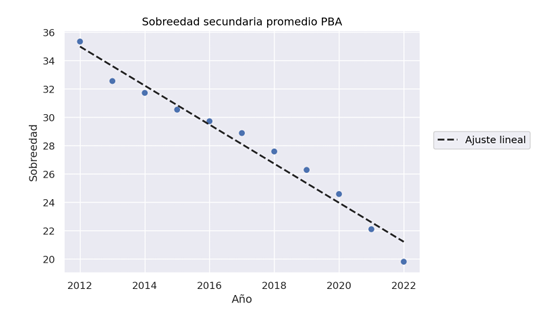

Para predecir el gráfico primero vamos a filtrar los datos de la sobreedad en los Municipios de la Provincia de Buenos Aires y luego hacemos el gráfico

In [57]:
sobreedad_promedio_por_año = (
    df_educacion
    .groupby("anio")["sobreedad_secundaria"]
    .mean()
    .reset_index() # lo convierte en un DataFrame para poder graficarlo
)

sobreedad_promedio_por_año

,anio,sobreedad_secundaria
0,2012,35.344074
1,2013,32.554889
2,2014,31.719704
3,2015,30.535333
4,2016,29.719556
5,2017,28.883259
6,2018,27.584370
7,2019,26.282370
8,2020,24.578519
9,2021,22.097556


Ahora aplico los pasos para la regresión Lineal

In [60]:
# Datos para regresión
X = sobreedad_promedio_por_año['anio'].values.reshape(-1, 1)
y = sobreedad_promedio_por_año['sobreedad_secundaria'].values
X, y

(array([[2012],
        [2013],
        [2014],
        [2015],
        [2016],
        [2017],
        [2018],
        [2019],
        [2020],
        [2021],
        [2022]], dtype=int64),
 array([35.34407407, 32.55488889, 31.7197037 , 30.53533333, 29.71955556,
        28.88325926, 27.58437037, 26.28237037, 24.57851852, 22.09755556,
        19.80466667]))

In [62]:
# Ajustar el modelo
modelo = linear_model.LinearRegression(fit_intercept=True)  # Usamos fit_intercept=True para incluir la intersección
modelo.fit(X, y)

LinearRegression()

In [64]:
# Predicciones sobre los mismos años
y_pred = modelo.predict(X)
y_pred

array([34.99089226, 33.61279192, 32.23469158, 30.85659125, 29.47849091,
       28.10039057, 26.72229024, 25.3441899 , 23.96608956, 22.58798923,
       21.20988889])

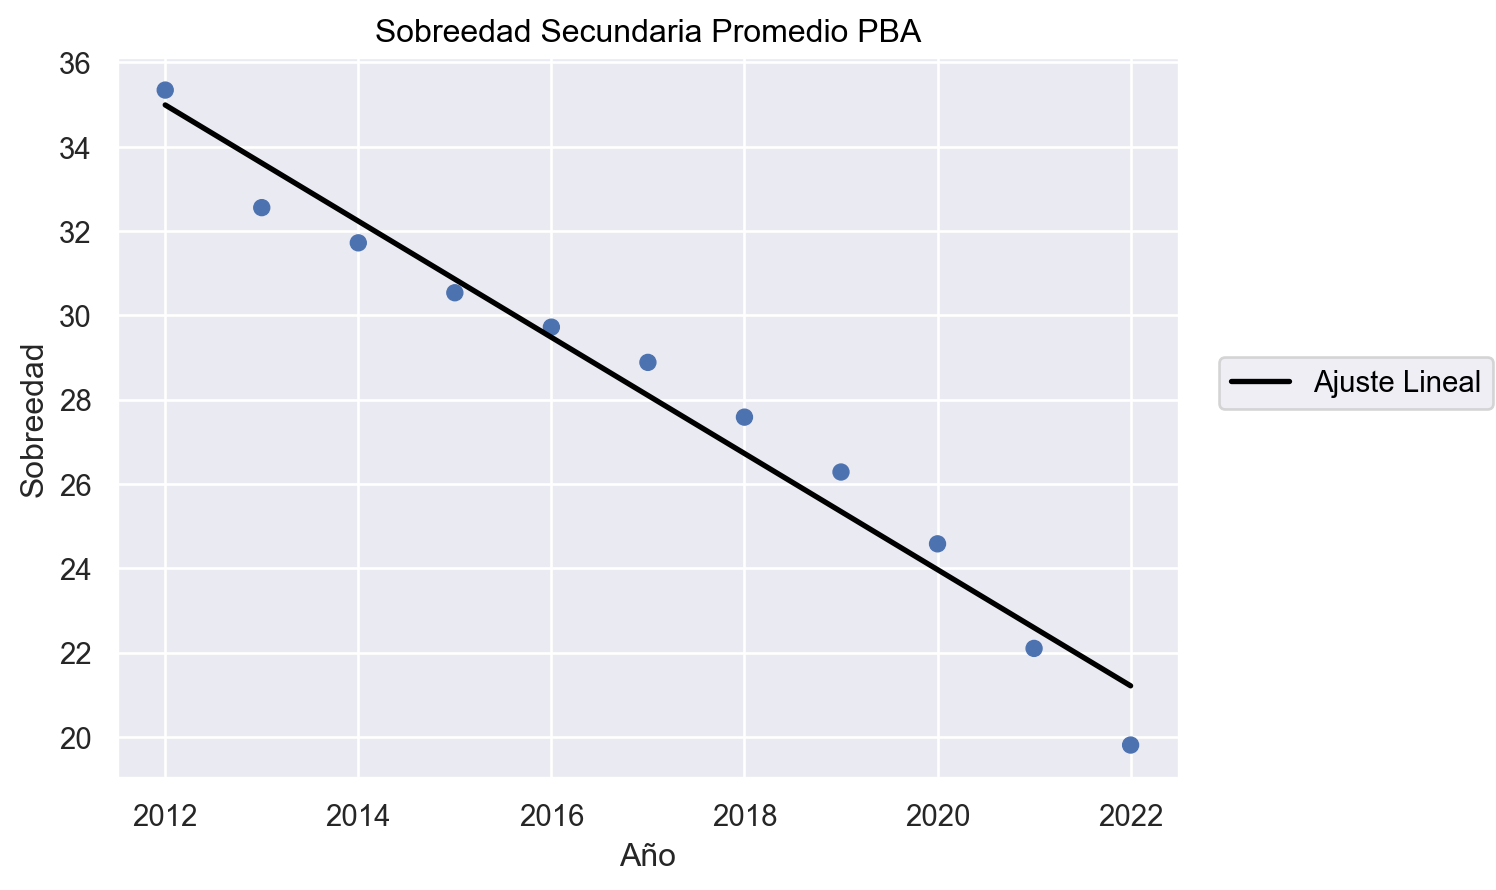

In [66]:
# Gráfico
(
    so.Plot(sobreedad_promedio_por_año, x="anio", y="sobreedad_secundaria")
    .add(so.Dot())  # Los puntos de datos
    .add(so.Line(color='black', linewidth=2), so.PolyFit(1), label="Ajuste Lineal")  # Agregar la línea de regresión y su leyenda
    .label(title='Sobreedad Secundaria Promedio PBA', x='Año', y='Sobreedad')
)

**2.** Realizando una Regresión Lineal, predecir para el año 2025 la sobreedad en secundaria promedio en la Provincia de Buenos Aires.

In [69]:
# Valores de los coeficientes para la prediccion 
beta_0 = modelo.intercept_
beta_1 = modelo.coef_[0]
beta_0, beta_1

(2807.7287696969706, -1.3781003367003373)

Es decir que:
$$ Sobreedad = 2807.7 - 1.38 * Año $$

In [72]:
año_prediccion = np.array([[2025]])
sobreedad_2025 = modelo.predict(año_prediccion)[0]
sobreedad_2025

17.0755878787877

Por lo tanto, la sobreedad´promedio en Secundaria para el año 2025 será de **17 años**.

**3.** Para cada municipio del Área Metropolitana, mediante Regresión Lineal, predecir la sobreedad en secundaria para el 2025. Elaborar un DataFrame indexado por el nombre del municipio, con dos columnas: sobreedad_2025 con el resultado de la predicción para 2025 y menor_que_promedio que indique con un booleano si la predicción es menor al valor calculado en el ítem anterior.

In [233]:
area_metropolitana = ['Almirante Brown', 'Avellaneda', 'Berazategui', 'Berisso', 'Brandsen', 'Campana', 'Cañuelas',
                      'Ensenada', 'Escobar', 'Esteban Echeverria', 'Exaltacion de la Cruz', 'Ezeiza',
                      'Florencio Varela', 'General Las Heras', 'General Rodriguez', 'General San Martin', 'Hurlingham',
                      'Ituzaingo', 'Jose C. Paz', 'La Matanza', 'La Plata', 'Lanus', 'Lujan', 'Lomas de Zamora',
                      'Malvinas Argentinas', 'Marcos Paz', 'Merlo', 'Moreno', 'Moron', 'Pilar', 'Presidente Peron',
                      'Quilmes', 'San Fernando', 'San Isidro', 'San Miguel', 'San Vicente', 'Tigre', 'Tres de Febrero',
                      'Vicente Lopez', 'Zarate']

### Visualización con datos geográficos

El objetivo de esta parte del TP es visualizar datos sobre un mapa de Buenos Aires. Para esto, utilizaremos las librerías geopandas, que nos permite trabajar con un .geojson como si fuera un DataFrame de pandas, y plotly para generar mapas interactivos

#### Ejercicio 1
Cargar los datos de `partidos.geojson` utilizando `geopandas`:

In [76]:
# Cargamos el archivo json cpn los datos
df_geo = gpd.read_file('partidos.geojson')
df_geo

,cca,cde,fna,gna,nam,sag,ara3,arl,geometry
0,045,06357,Partido de General Pueyrredón,Partido,General Pueyrredón,ARBA,1463.50,1460.74,"MULTIPOLYGON (((-57.54 -38.06, -57.53 -38.05, ..."
1,055,06441,Partido de La Plata,Partido,La Plata,ARBA,892.63,942.23,"MULTIPOLYGON (((-58.14 -34.99, -58.13 -35, -58..."
2,070,06427,Partido de La Matanza,Partido,La Matanza,ARBA,328.19,329.22,"MULTIPOLYGON (((-58.58 -34.65, -58.58 -34.65, ..."
3,030,06260,Partido de Esteban Echeverría,Partido,Esteban Echeverría,ARBA,120.45,120.22,"MULTIPOLYGON (((-58.51 -34.73, -58.51 -34.73, ..."
4,074,06560,Partido de Moreno,Partido,Moreno,ARBA,186.05,186.13,"MULTIPOLYGON (((-58.78 -34.56, -58.77 -34.56, ..."
...,...,...,...,...,...,...,...,...,...
138,132,06412,Partido de José C. Paz,Partido,José C. Paz,ARBA,50.01,50.16,"MULTIPOLYGON (((-58.81 -34.48, -58.81 -34.48, ..."
139,314,06126,Partido de Islas Campana,Partido,Islas Campana,ARBA,682.96,NaN,"MULTIPOLYGON (((-58.9 -33.96, -58.9 -33.96, -5..."
140,113,06182,Partido de Coronel Rosales,Partido,Coronel Rosales,ARBA,1283.36,1622.60,"MULTIPOLYGON (((-61.74 -38.63, -61.74 -38.63, ..."
141,357,06805,Partido de Islas Tigre,Partido,Islas Tigre,ARBA,280.36,NaN,"MULTIPOLYGON (((-58.65 -34.27, -58.64 -34.27, ..."


Si imprimimos geo_df observamos que cada fila corresponde a un municipio con distintas características y, además, hay una columna geometry que tiene las coordenadas de los límites de los partidos. Pueden visualizar estos datos con geo_df.plot().

<Axes: >

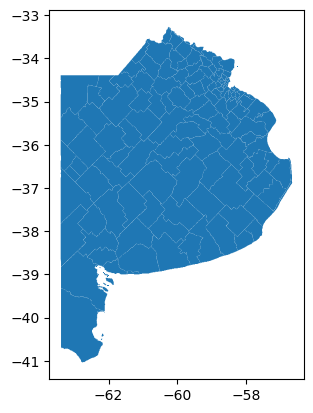

In [81]:
# Visualizamos los datos como Partidos
df_geo.plot()

#### Ejercicio 2
Identificar qué columna se corresponde al número de identificación de cada municipio. Mostrar
todos los municipios con números de identificación repetidos.
**Sugerencia**: utilizar el argumento `keep` del método `duplicated`

Hacemos uso del metodo `.nunique()` a la Serie `df_geo['nam']`  (diremos que nam correspondiente a la columna de los municipios, aunque tambien podria haber sido la columna `fna` pues sus valores unicamente se diferencian porque estas comienzan con "Partido de" obteniendo 143, esto coincide con el numero de filas del DataFrame df_geo. Por esa razón para ubicar cual es la columna con los numeros de identificación con valores repetidos, a esa dicha Serie `"df_geo['__']"` al aplicar `.nunique()` debo obtener un valor `menor a 143`.

Observamos que la columna buscada no puede ser gna ni sag porque son columnas con valor unico para las 143 filas. Tampoco la columnas arl porque aunque `df_geo['arl'].nunique() resulte 135`, tengo que al obtener otro DataFrame con los valores repetidos con `geo_df[geo_df['arl'].duplicated()]`, son todos de valor nulo (NaN) que no es un identificador (y aunque lo fuera tiene asignados municipios todos diferentes que comienzan en `Islas` (dato que lo veremos más adelante). Por ultimo la columna `ara3` no puede ser tampoco pues ademas que contiene tambien valores float como con arl (no son valores usual que funcionen como identificar),`df_geo['ara3'].nunique() resulta 143` y por lo tanto no hay repeticiones. Por otro lado la columna geometry es muy evidente que no lo será.

`Finalmente` comparamos resultados de aplicar metodo .nunique() para las seies correspondientes a columnas `cca` y `cde` pues sus valores son de tipo string pues comienzan en 0 (forma habitual de asignar un identificador). Asi `df_geo['cca'].nunique() resulto en 143` mientras que `df_geo['cde'].nunique() en 134` y por lo tanto es la columna que buscabamos pues encontramos que tiene valores repetidos de los numeros de identificación.


In [99]:
df_geo['cca'].nunique()

143

In [101]:
df_geo['cde'].nunique()

134

Siguiendo la sugerencia uso el metodo `.duplicated(keep="first") y .duplicated(keep='last')` y me doy cuenta que solo hubo una repeticion para cada valor repetido de la columna cde y eso porque los municipios que comienzan con la palabra Islas son las mismas que las que no. Para ver esto genero un nuevo DataFrame `df_municipiosRepetidos` con los valores de cde repetidos mediante metodo .concat() y para visualizar aquel df, los ordeno gracias al metodo `.sort_values()`. Además podemos en la Serie `df_municipiosRepetidos.set_index("cde")['nam']` podemos ver que ademas de la diferencia de la palabra Islas que era evidente a simple vista, tambien tenemos que los municipios de Chascomus y Lezama presentan los mismos identificador `06217`, asunto que parecería un error en el Dataframe.

In [107]:
gdf1= geo_df[geo_df['cde'].duplicated(keep='first')]
gdf2= geo_df[geo_df['cde'].duplicated(keep='last')]
df_municipiosRepetidos = pd.concat([gdf1, gdf2], axis=0).sort_values("cde")
display(df_municipiosRepetidos)
df_municipiosRepetidos.set_index("cde")['nam']

,cca,cde,fna,gna,nam,sag,ara3,arl,geometry
126,309,06070,Partido de Islas Baradero,Partido,Islas Baradero,ARBA,365.56,NaN,"MULTIPOLYGON (((-59.48 -33.66, -59.48 -33.67, ..."
65,009,06070,Partido de Baradero,Partido,Baradero,ARBA,1142.10,1591.87,"MULTIPOLYGON (((-59.56 -33.77, -59.56 -33.77, ..."
139,314,06126,Partido de Islas Campana,Partido,Islas Campana,ARBA,682.96,NaN,"MULTIPOLYGON (((-58.9 -33.96, -58.9 -33.96, -5..."
38,014,06126,Partido de Campana,Partido,Campana,ARBA,302.83,954.54,"MULTIPOLYGON (((-59.1 -34.2, -59.09 -34.19, -5..."
76,027,06217,Partido de Chascomús,Partido,Chascomús,ARBA,3161.49,3127.80,"MULTIPOLYGON (((-57.99 -35.33, -57.99 -35.33, ..."
135,137,06217,Partido de Lezama,Partido,Lezama,ARBA,1044.82,1035.39,"MULTIPOLYGON (((-57.86 -35.69, -57.86 -35.69, ..."
130,387,06665,Partido de Islas Ramallo,Partido,Islas Ramallo,ARBA,89.97,NaN,"MULTIPOLYGON (((-59.82 -33.58, -59.82 -33.58, ..."
28,087,06665,Partido de Ramallo,Partido,Ramallo,ARBA,981.08,951.51,"MULTIPOLYGON (((-60.2 -33.54, -60.2 -33.54, -6..."
128,396,06749,Partido de Islas San Fernando,Partido,Islas San Fernando,ARBA,1033.72,NaN,"MULTIPOLYGON (((-58.45 -34, -58.43 -34, -58.4 ..."
103,096,06749,Partido de San Fernando,Partido,San Fernando,ARBA,24.05,877.08,"MULTIPOLYGON (((-58.56 -34.42, -58.56 -34.42, ..."


cde
06070          Islas Baradero
06070                Baradero
06126           Islas Campana
06126                 Campana
06217               Chascomús
06217                  Lezama
06665           Islas Ramallo
06665                 Ramallo
06749      Islas San Fernando
06749            San Fernando
06763    Islas de San Nicolas
06763             San Nicolás
06770         Islas San Pedro
06770               San Pedro
06805             Islas Tigre
06805                   Tigre
06882                  Zárate
06882         Islas de Zárate
Name: nam, dtype: object

#### Ejercicio 3
Aplicar las siguientes modificaciones a `geo_df`:
1. eliminar las filas que correspondan a islas de partidos (por ejemplo, Islas Ramallo).
2. convertir la columna `cde` a numérica (recordar el método `astype`)
3. corregir los valores en la columna cde para los partidos de Chascomús y Lezama, para
que coincidan con sus valores en la columna `municipio_id` de `df_educacion`. **Sugerencia**: puede basarse en el siguiente código para corregir los valores:

`geo_df.loc[geo_df[???] == ???, <columna a modificar>] = ???`

Finalmente, exportar `geo_df` como un GeoJSON llamado `partidos_limpio.geojson`:

**3.1**- Para eliminar filas debemos reescribir el DataFrame `df_geo`, para eso haremos uso del método `.apply()` a la columna `'nam'` usando la función `lambda` para obtener las que no comienzan con Islas `not(n.startswith("Islas"))`, así obtenemos una Serie de boleanos llamada `sin_Islas` que enlazaremos al DataFrame original para así quitar a los que comiencen con `Islas` quedándonos con 135 filas que son las que casi tienen identificadores no repetidos, de no ser por el caso de los municipios de `Chascomus y Lezama`.

In [122]:
sin_Islas= df_geo['nam'].apply(lambda n: not(n.startswith("Islas")))
sin_Islas

0       True
1       True
2       True
3       True
4       True
       ...  
138     True
139    False
140     True
141    False
142    False
Name: nam, Length: 143, dtype: bool

In [124]:
df_geo = df_geo[sin_Islas]
df_geo

,cca,cde,fna,gna,nam,sag,ara3,arl,geometry
0,045,06357,Partido de General Pueyrredón,Partido,General Pueyrredón,ARBA,1463.50,1460.74,"MULTIPOLYGON (((-57.54 -38.06, -57.53 -38.05, ..."
1,055,06441,Partido de La Plata,Partido,La Plata,ARBA,892.63,942.23,"MULTIPOLYGON (((-58.14 -34.99, -58.13 -35, -58..."
2,070,06427,Partido de La Matanza,Partido,La Matanza,ARBA,328.19,329.22,"MULTIPOLYGON (((-58.58 -34.65, -58.58 -34.65, ..."
3,030,06260,Partido de Esteban Echeverría,Partido,Esteban Echeverría,ARBA,120.45,120.22,"MULTIPOLYGON (((-58.51 -34.73, -58.51 -34.73, ..."
4,074,06560,Partido de Moreno,Partido,Moreno,ARBA,186.05,186.13,"MULTIPOLYGON (((-58.78 -34.56, -58.77 -34.56, ..."
...,...,...,...,...,...,...,...,...,...
135,137,06217,Partido de Lezama,Partido,Lezama,ARBA,1044.82,1035.39,"MULTIPOLYGON (((-57.86 -35.69, -57.86 -35.69, ..."
136,127,06847,Partido de Tres Lomas,Partido,Tres Lomas,ARBA,1255.10,1262.45,"MULTIPOLYGON (((-62.94 -36.25, -62.94 -36.25, ..."
137,108,06833,Partido de Tres Arroyos,Partido,Tres Arroyos,ARBA,5935.60,5962.88,"MULTIPOLYGON (((-60.68 -38.09, -60.67 -38.1, -..."
138,132,06412,Partido de José C. Paz,Partido,José C. Paz,ARBA,50.01,50.16,"MULTIPOLYGON (((-58.81 -34.48, -58.81 -34.48, ..."


**3.2**- Para convertir la columna `cde` a numérica nuevamente debemos sobreescribir el Dataframe `df_geo`, para ello modificaremos la columna `cde` pues con ayuda del método `.astype()` convertimos los valores de la columna `cde` a int mediante `df_geo['cde'].astype(int)`. Asi, luego, reescribimos la Serie `df_geo['cde']` con la modificada que llamamos `cde_str_a_int` mediante el método `.loc[:,'___']`

In [140]:
cde_str_a_int = df_geo['cde'].astype(int)
df_geo.loc[:,'cde'] = cde_str_a_int
df_geo

,cca,cde,fna,gna,nam,sag,ara3,arl,geometry
0,045,6357,Partido de General Pueyrredón,Partido,General Pueyrredón,ARBA,1463.50,1460.74,"MULTIPOLYGON (((-57.54 -38.06, -57.53 -38.05, ..."
1,055,6441,Partido de La Plata,Partido,La Plata,ARBA,892.63,942.23,"MULTIPOLYGON (((-58.14 -34.99, -58.13 -35, -58..."
2,070,6427,Partido de La Matanza,Partido,La Matanza,ARBA,328.19,329.22,"MULTIPOLYGON (((-58.58 -34.65, -58.58 -34.65, ..."
3,030,6260,Partido de Esteban Echeverría,Partido,Esteban Echeverría,ARBA,120.45,120.22,"MULTIPOLYGON (((-58.51 -34.73, -58.51 -34.73, ..."
4,074,6560,Partido de Moreno,Partido,Moreno,ARBA,186.05,186.13,"MULTIPOLYGON (((-58.78 -34.56, -58.77 -34.56, ..."
...,...,...,...,...,...,...,...,...,...
135,137,6217,Partido de Lezama,Partido,Lezama,ARBA,1044.82,1035.39,"MULTIPOLYGON (((-57.86 -35.69, -57.86 -35.69, ..."
136,127,6847,Partido de Tres Lomas,Partido,Tres Lomas,ARBA,1255.10,1262.45,"MULTIPOLYGON (((-62.94 -36.25, -62.94 -36.25, ..."
137,108,6833,Partido de Tres Arroyos,Partido,Tres Arroyos,ARBA,5935.60,5962.88,"MULTIPOLYGON (((-60.68 -38.09, -60.67 -38.1, -..."
138,132,6412,Partido de José C. Paz,Partido,José C. Paz,ARBA,50.01,50.16,"MULTIPOLYGON (((-58.81 -34.48, -58.81 -34.48, ..."


**3.3**- Para este punto haremos uso de la sugerencia. Antes averiguamos cual es el valor municipio_id para el municipio de Lezama como para el de Chascomús. Para ello ubicamos el valor único de `municipio_id` usando el método `.unique()` en el DataFrame `df_educacion` que filtramos por el nombre del municipio Lezama y Chascomús obteniendo que dichos identificadores son `6466` (ubicado por primera vez en índice 770 de dicho df) y `6218`(ubicado por pirmera vez en índice 253, esto nos servirá cuando debamos hacer uso del metodo `.loc[])`) respectivamente. Podríamos reemplazar estos valores directamente por los valores cde en el Dataframe df_geo pero usaremos la `sugerencia`

In [145]:
df_educacion[df_educacion['municipio_nombre'] == 'Lezama']['municipio_id'].unique()[0]

6466

In [147]:
df_educacion[df_educacion['municipio_nombre'] == 'Lezama']['municipio_id'].loc[770]

6466

In [149]:
df_educacion[df_educacion['municipio_nombre'] == 'Chascomus']['municipio_id'].unique()[0]

6218

In [151]:
df_educacion[df_educacion['municipio_nombre'] == 'Chascomus']['municipio_id'].loc[253]

6218

Siguiendo la sugerencia:
`geo_df.loc[geo_df[???] == ???, <columna a modificar>] = ???`
podríamos usar para el reemplazo el método `.loc[]` o el `.unique()[0]`  porque obtendríamos los mismos valores como se aprecia arriba.

In [156]:
df_geo.loc[df_geo["nam"] == 'Chascomus', "cde"] = df_educacion[df_educacion['municipio_nombre'] == 'Chascomus']['municipio_id'].loc[253]
df_geo.loc[df_geo["nam"] == 'Lezama', "cde"] = df_educacion[df_educacion['municipio_nombre'] == 'Lezama']['municipio_id'].loc[770]

In [158]:
df_geo[df_geo["nam"] == 'Chascomus']

,cca,cde,fna,gna,nam,sag,ara3,arl,geometry


In [160]:
# Grabamos los datos limpios en un nuevo archivo GeoJSON
geo_df.to_file('partidos_limpio.geojson', driver='GeoJSON')

#### Ejercicio 4
A partir del DataFrame `df_educacion`, crear un DataFrame `repit` que tenga tres colum-
nas: `cde` con el código del municipio, `municipio_nombre` con el nombre del municipio y
`repitencia_secundaria` con el promedio de repitencia en secundaria del municipio.

**Sugerencia**: Partir de `df_educacion.groupby(['municipio_id', 'municipio_nombre'])`.
Si obtienen una serie con multi-indices, pueden convertirlo a DataFrame con columnas para los índices utilizando `.reset_index()`. O si ingresan el nombre de la columna `repitencia_secundaria` entre doble corchetes, obtienen también un DataFrame con las tres columnas

In [167]:
# Creamos un DataFrame repit con los datos de repitencia siguiendo la consigna del TP

#### Ejercicio 5
Con el siguiente código podemos elaborar un mapa interactivo:

In [ ]:
with open('partidos_limpio.geojson', 'r') as f:
    partidos = json.load(f)

fig = px.choropleth_map(
    repit,
    geojson=partidos,
    featureidkey = 'properties.cde',
    locations='cde',
    color='repitencia_secundaria',
    zoom = 4,
    center = {"lat": -34.61315, "lon": -58.37723},
)

fig.show()

Agregar argumentos a `choropleth_map` para que:
1. la escala de color sea 'Bluered' (pueden ver otras escalas de color en este link)
2. la opacidad del color sea de 0.7
3. que al pasar el cursor sobre un partido, se muestre también su nombre

In [ ]:
# Generamos un gráfico interactivo para el nivel de repitencia

# Si no existe chorpleth_map o alguna opcion del codigo en la siguiente celda, actualizar plotly con el siguiente comando y reiniciar el kernel.
#!pip install plotly --upgrade

# Si tienen algún error de Java después de instalar los paquetes actualizados y reiniciar el kernel, prueben refrescar el navegador con CTRL+F5.

### Análisis exploratorio

La idea de este ítem es que realicen un análisis exploratorio de los datos, aplicando las herramientas de visualización (seaborn.objects, seaborn y/o matplotlib), de resumen de datos (media, mediana, desvío estándar, operaciones sobre el DataFrame, etc.) y/o de Regresión.
El objetivo es entender, comparar y/o estudiar aspectos en los indicadores educativos de los partidos de la Provincia de Buenos Aires. Algunas preguntas disparadoras pueden ser:
- ¿Existe alguna relación entre la repitencia y los fondos enviados al partido para la educación?
- ¿Podemos explicar por qué hay algunos partidos con repitencia muy superior al promedio?
- ¿Qué relación hay entre la cantidad de habitantes y la cantidad de establecimientos educativos?
-
No es necesario que respondan a cada una de esas preguntas (ni se limiten a eso), lo mejor es que exploren por donde se les ocurra. Alentamos que se planteen hipótesis y usen los datos para corroborarlas o rechazarlas. Pueden aplicar cualquiera de las herramientas que hemos visto hasta ahora. Asimismo, pueden centrarse en un conjunto de partidos, en un conjunto de indicadores educativos, etc.

A continuación dejamos otros datasets que pueden serles de ayuda (su uso es opcional):
- [Establecimientos educativos](https://catalogo.datos.gba.gob.ar/dataset/establecimientos-educativos)
- [Población](https://catalogo.datos.gba.gob.ar/dataset/poblacion)
- [Transferencias a Consejos Escolares](https://catalogo.datos.gba.gob.ar/dataset/tranferencias-consejos-escolares)
- [Transferencias a municipios](https://catalogo.datos.gba.gob.ar/dataset/transferencias-municipios)

También pueden explorar datasets del Gobierno Nacional o de la Ciudad de Buenos Aires (pero
que el análisis esté centrado en PBA).


**Importante**: en el Notebook, las visualizaciones y resúmenes de datos que realicen deben
estar acompañados por las conclusiones que obtengan a partir de ellos.